<a href="https://colab.research.google.com/github/mpiatek26/Prophet_Time_Series_Chicago_Crime_Rate/blob/main/Predict_Crime_Rate_in_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Data

In [9]:
!pip install prophet

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

In [12]:
# dataframes creation for both training and testing datasets
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

<ipython-input-12-1a9c345ffde3>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
Skipping line 533719: expected 23 fields, saw 24

<ipython-input-12-1a9c345ffde3>:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
<ipython-input-12-1a9c345ffde3>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
<ipython-input-12-1a9c345ffde3>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_3 = pd.read_csv(

In [48]:
chicago_df_1.shape

(788590, 23)

In [49]:
chicago_df_2.shape

(792732, 23)

In [50]:
chicago_df_3.shape

(784609, 23)

In [54]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)

In [55]:
chicago_df.shape

(2365931, 23)

Exploring the dataset

In [56]:
# Let's view the head of the training dataset
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [57]:
# Let's view the last elements in the training dataset
chicago_df.tail(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
784589,3119970,9577572,HX226257,04/16/2014 07:45:00 PM,017XX W MONTROSE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,TAXICAB,False,...,47.0,3.0,11,1164326.0,1929280.0,2014.0,02/04/2016 06:33:39 AM,41.961565,-87.671233,"(41.961565365, -87.671232993)"
784590,3119971,9577577,HX227949,04/18/2014 08:40:00 AM,049XX N NEW ENGLAND AVE,1780,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE PORCH/HALLWAY,False,...,41.0,10.0,26,1129591.0,1932370.0,2014.0,02/04/2016 06:33:39 AM,41.970710,-87.798869,"(41.970710117, -87.798869168)"
784591,3119972,9577584,HX227880,04/18/2014 07:15:00 AM,011XX N DEARBORN ST,0820,THEFT,$500 AND UNDER,DELIVERY TRUCK,False,...,42.0,8.0,06,1175733.0,1907826.0,2014.0,02/04/2016 06:33:39 AM,41.902445,-87.629942,"(41.902445346, -87.629942006)"
784592,3119973,9577585,HX227967,04/17/2014 09:30:00 PM,023XX N RUTHERFORD AVE,0810,THEFT,OVER $500,STREET,True,...,36.0,18.0,06,1131093.0,1914605.0,2014.0,02/04/2016 06:33:39 AM,41.921935,-87.793757,"(41.921935121, -87.793757305)"
784593,3119974,9577588,HX227429,04/17/2014 07:25:00 PM,041XX N CICERO AVE,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,...,45.0,15.0,06,1143638.0,1926846.0,2014.0,02/04/2016 06:33:39 AM,41.955300,-87.747355,"(41.95529972, -87.747355376)"
784594,3119975,9577589,HX227882,04/17/2014 01:00:00 AM,077XX S ESSEX AVE,0820,THEFT,$500 AND UNDER,STREET,False,...,7.0,43.0,06,1194204.0,1854115.0,2014.0,02/04/2016 06:33:39 AM,41.754624,-87.563864,"(41.754624469, -87.563863568)"
784595,3119976,9577590,HX227901,04/18/2014 01:00:00 AM,089XX S UNION AVE,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,...,21.0,71.0,06,1173206.0,1845613.0,2014.0,02/04/2016 06:33:39 AM,41.731783,-87.641065,"(41.73178346, -87.64106501)"
784596,3119977,9577591,HX227888,04/17/2014 06:00:00 PM,012XX N WOLCOTT AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,...,1.0,24.0,14,1163496.0,1908503.0,2014.0,02/04/2016 06:33:39 AM,41.904570,-87.674871,"(41.904569616, -87.674871202)"
784597,3119978,9577593,HX227886,04/17/2014 08:30:00 PM,025XX N GREENVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,...,32.0,7.0,14,1165897.0,1916825.0,2014.0,02/04/2016 06:33:39 AM,41.927355,-87.665814,"(41.927354789, -87.665813749)"
784598,3119979,9577594,HX227864,04/18/2014 02:00:00 AM,063XX N TALMAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,50.0,2.0,07,1157509.0,1942031.0,2014.0,02/04/2016 06:33:39 AM,41.996697,-87.695947,"(41.99669653, -87.695947259)"


<Axes: >

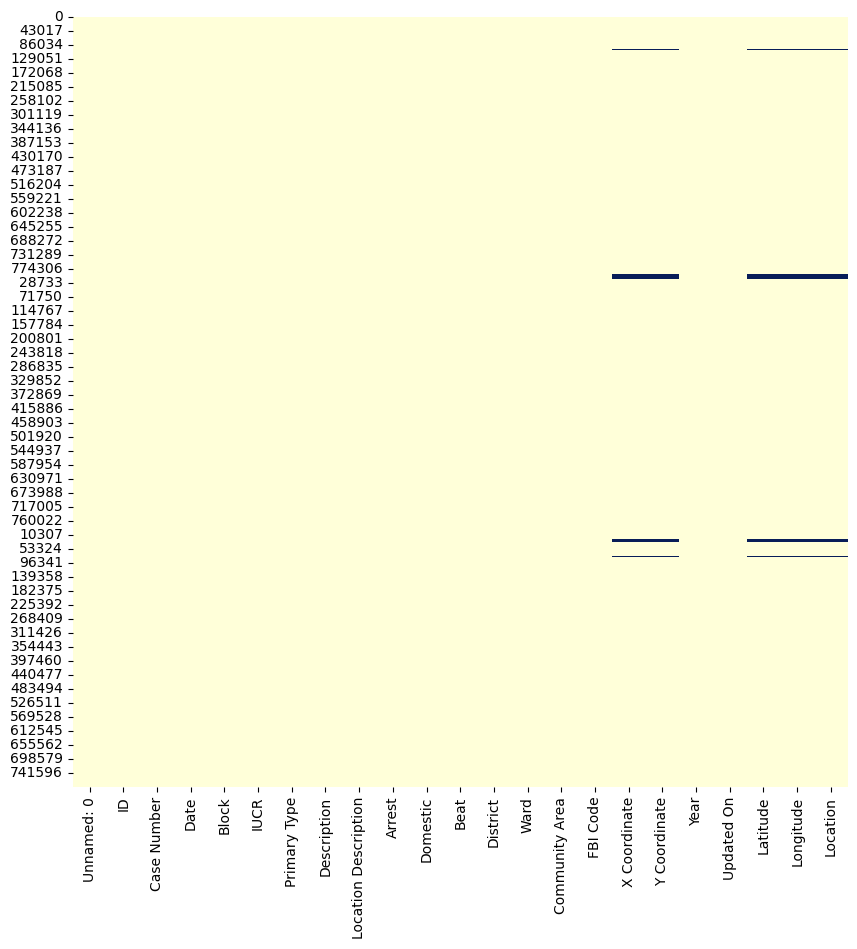

In [58]:
# Number of null elements that are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [59]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [60]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
784604,04/17/2014 08:45:00 AM,015XX N CLYBOURN AVE,BATTERY,SIMPLE,CTA TRAIN,False,False
784605,04/18/2014 01:30:00 AM,081XX S CENTRAL PARK AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False
784606,04/17/2014 08:45:00 PM,069XX S CAMPBELL AVE,THEFT,OVER $500,STREET,False,False
784607,03/30/2014 10:04:00 PM,063XX N SHERIDAN RD,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False


In [62]:
# Assembling a datetime by rearranging the dataframe column "Date".

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [63]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
784604,2014-04-17 08:45:00,015XX N CLYBOURN AVE,BATTERY,SIMPLE,CTA TRAIN,False,False
784605,2014-04-18 01:30:00,081XX S CENTRAL PARK AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False
784606,2014-04-17 20:45:00,069XX S CAMPBELL AVE,THEFT,OVER $500,STREET,False,False
784607,2014-03-30 22:04:00,063XX N SHERIDAN RD,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False


In [64]:
# setting the index to be the date
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [65]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2014-04-17 08:45:00,2014-04-17 08:45:00,015XX N CLYBOURN AVE,BATTERY,SIMPLE,CTA TRAIN,False,False
2014-04-18 01:30:00,2014-04-18 01:30:00,081XX S CENTRAL PARK AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False
2014-04-17 20:45:00,2014-04-17 20:45:00,069XX S CAMPBELL AVE,THEFT,OVER $500,STREET,False,False


In [23]:
chicago_df['Primary Type'].value_counts()

THEFT                                492535
BATTERY                              426970
CRIMINAL DAMAGE                      278194
NARCOTICS                            269446
OTHER OFFENSE                        143233
BURGLARY                             141768
ASSAULT                              141407
MOTOR VEHICLE THEFT                  104309
ROBBERY                               89745
DECEPTIVE PRACTICE                    85202
CRIMINAL TRESPASS                     68017
PROSTITUTION                          25406
WEAPONS VIOLATION                     23442
PUBLIC PEACE VIOLATION                19229
OFFENSE INVOLVING CHILDREN            15376
CRIM SEXUAL ASSAULT                    8592
SEX OFFENSE                            7913
GAMBLING                               6003
INTERFERENCE WITH PUBLIC OFFICER       5702
LIQUOR LAW VIOLATION                   4908
ARSON                                  3596
KIDNAPPING                             1833
INTIMIDATION                    

In [66]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         492535
BATTERY                       426970
CRIMINAL DAMAGE               278194
NARCOTICS                     269446
OTHER OFFENSE                 143233
BURGLARY                      141768
ASSAULT                       141407
MOTOR VEHICLE THEFT           104309
ROBBERY                        89745
DECEPTIVE PRACTICE             85202
CRIMINAL TRESPASS              68017
PROSTITUTION                   25406
WEAPONS VIOLATION              23442
PUBLIC PEACE VIOLATION         19229
OFFENSE INVOLVING CHILDREN     15376
Name: Primary Type, dtype: int64

In [67]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'BURGLARY', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

<Axes: xlabel='count', ylabel='Primary Type'>

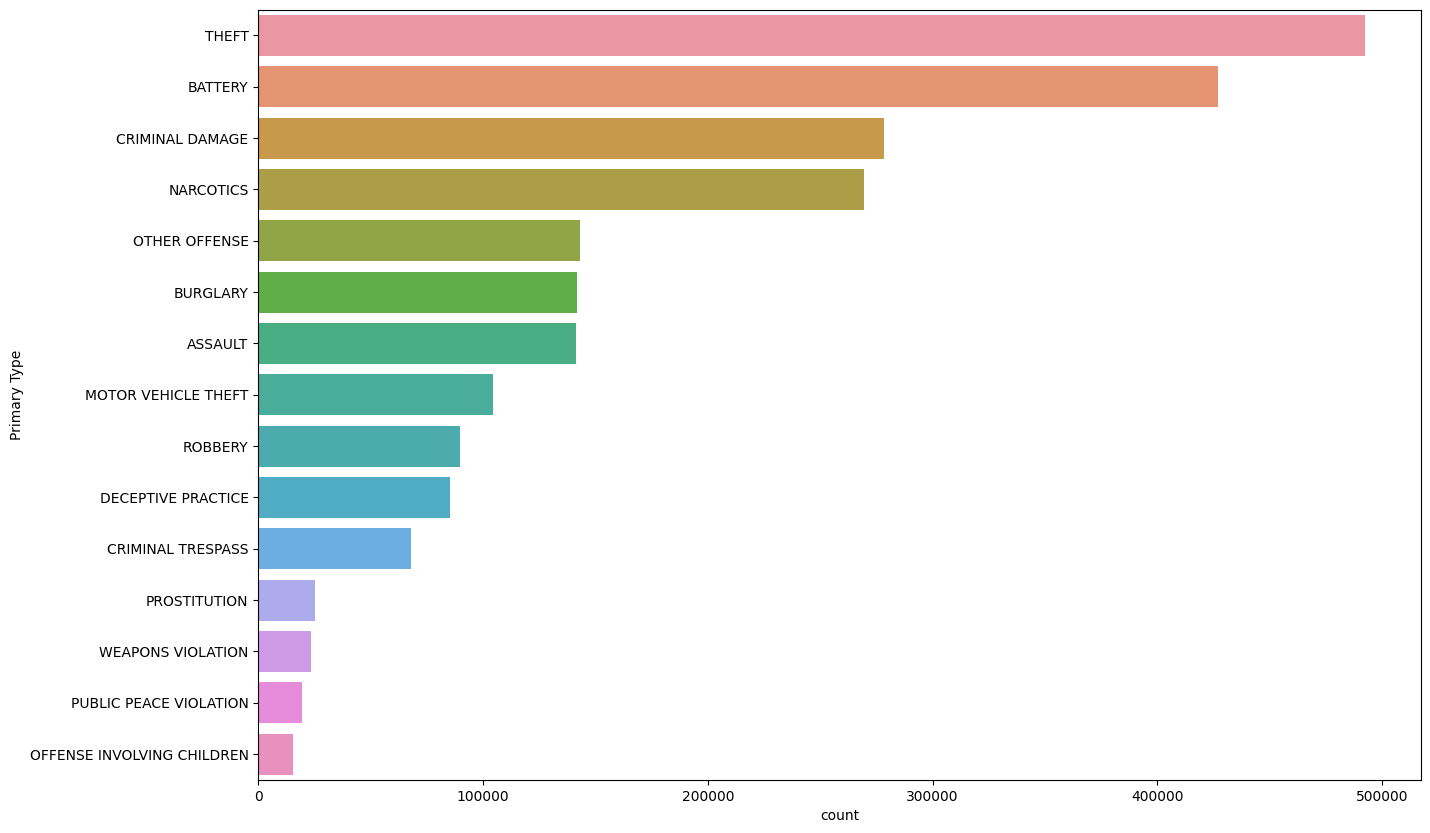

In [68]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

<Axes: xlabel='count', ylabel='Location Description'>

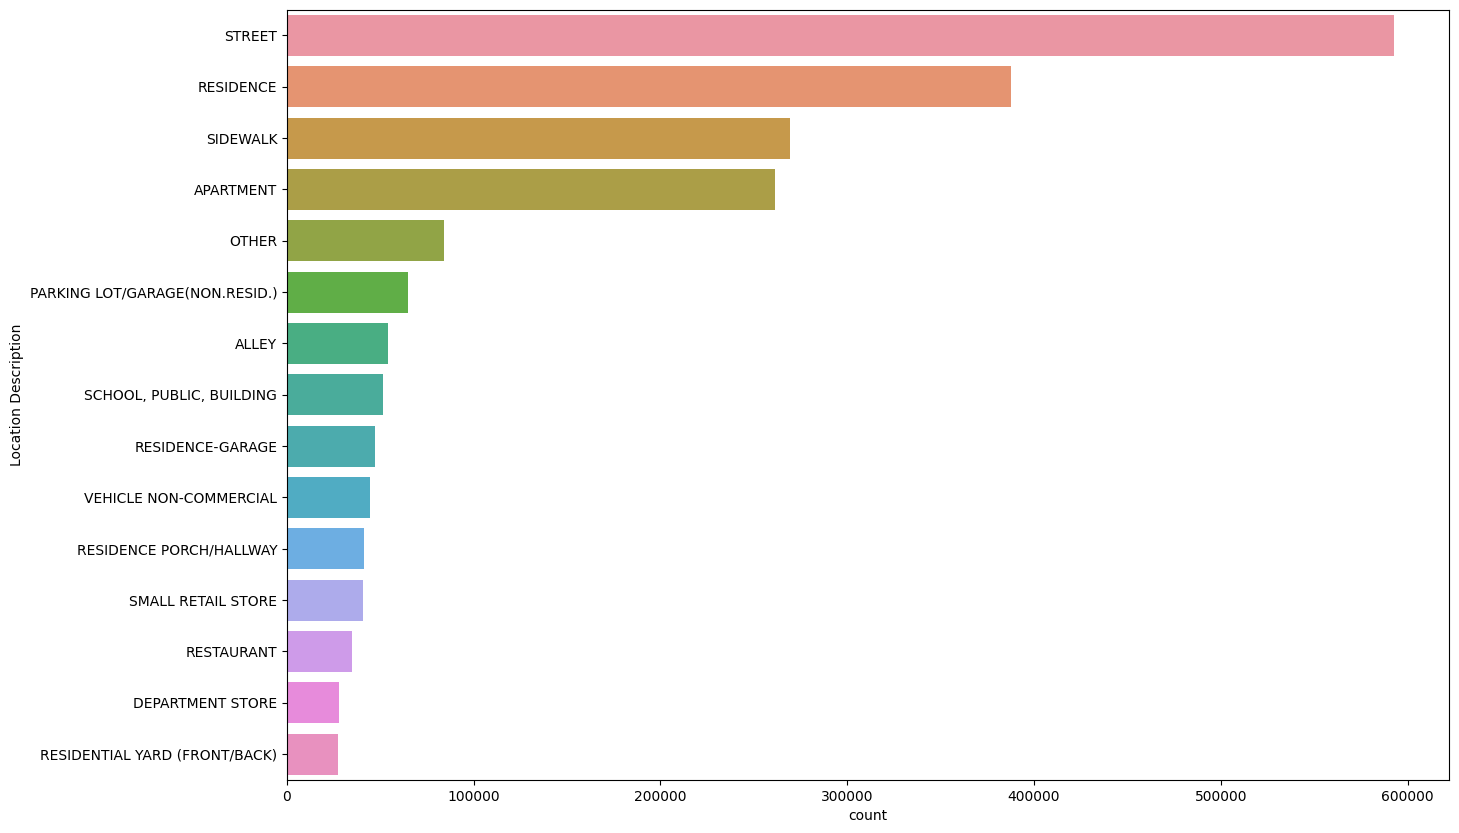

In [70]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [71]:
chicago_df.resample('Y').size()

Date
2005-12-31      3872
2006-12-31    599794
2007-12-31    184924
2008-12-31    426281
2009-12-31    364423
2010-12-31      1493
2011-12-31       535
2012-12-31    334628
2013-12-31    305578
2014-12-31     73909
2015-12-31     47454
2016-12-31     23040
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

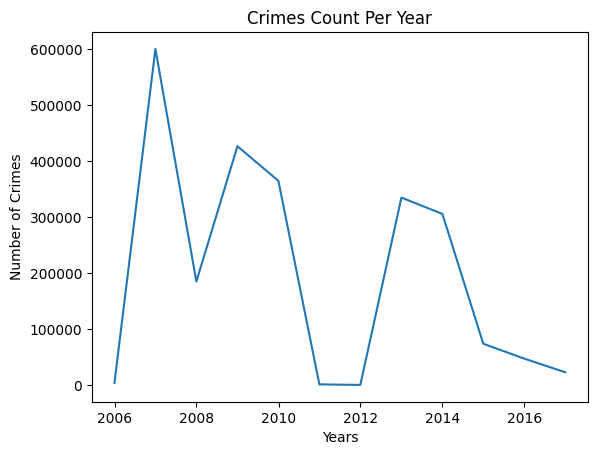

In [72]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [73]:
chicago_df.resample('M').size()

Date
2005-01-31      222
2005-02-28      102
2005-03-31      113
2005-04-30      169
2005-05-31      196
              ...  
2016-01-31      809
2016-02-29      123
2016-03-31      213
2016-04-30     1663
2016-05-31    20232
Freq: M, Length: 137, dtype: int64

Text(0, 0.5, 'Number of Crimes')

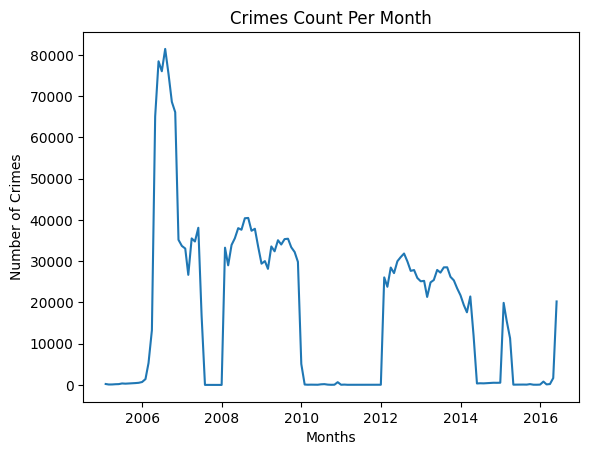

In [74]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [75]:
chicago_df.resample('Q').size()

Date
2005-03-31       437
2005-06-30       721
2005-09-30      1048
2005-12-31      1666
2006-03-31     19997
2006-06-30    219535
2006-09-30    225309
2006-12-31    134953
2007-03-31     95247
2007-06-30     89667
2007-09-30        10
2007-12-31         0
2008-03-31     96161
2008-06-30    111136
2008-09-30    118227
2008-12-31    100757
2009-03-31     91711
2009-06-30    101480
2009-09-30    104133
2009-12-31     67099
2010-03-31       205
2010-06-30       237
2010-09-30       291
2010-12-31       760
2011-03-31       145
2011-06-30       134
2011-09-30       120
2011-12-31       136
2012-03-31     78299
2012-06-30     88046
2012-09-30     89397
2012-12-31     78886
2013-03-31     71390
2013-06-30     80507
2013-09-30     83201
2013-12-31     70480
2014-03-31     58359
2014-06-30     12711
2014-09-30      1266
2014-12-31      1573
2015-03-31     46701
2015-06-30       222
2015-09-30       357
2015-12-31       174
2016-03-31      1145
2016-06-30     21895
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

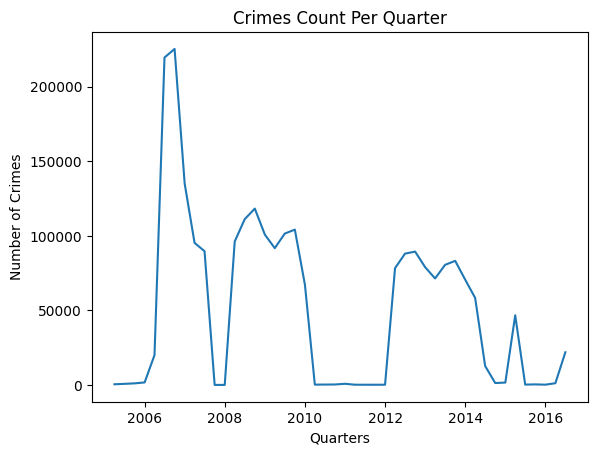

In [76]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

Preparing the data

In [77]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [78]:
chicago_prophet

,Date,0
0,2005-01-31,222
1,2005-02-28,102
2,2005-03-31,113
3,2005-04-30,169
4,2005-05-31,196
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [79]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [80]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,222
1,2005-02-28,102
2,2005-03-31,113
3,2005-04-30,169
4,2005-05-31,196
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [81]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [82]:
chicago_prophet_df

,Date,Crime Count
0,2005-01-31,222
1,2005-02-28,102
2,2005-03-31,113
3,2005-04-30,169
4,2005-05-31,196
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


Make predictions

In [83]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [84]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [85]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,222
1,2005-02-28,102
2,2005-03-31,113
3,2005-04-30,169
4,2005-05-31,196
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [86]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0sdxqo93/9kfviexd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0sdxqo93/ymguskpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20054', 'data', 'file=/tmp/tmp0sdxqo93/9kfviexd.json', 'init=/tmp/tmp0sdxqo93/ymguskpl.json', 'output', 'file=/tmp/tmp0sdxqo93/prophet_modelgziovelz/prophet_model-20231106195043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [91]:
# Forcasting into the future
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)

In [92]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,25528.406670,2607.833838,47992.528445,25528.406670,25528.406670,-2166.603050,-2166.603050,-2166.603050,-2166.603050,-2166.603050,-2166.603050,0.0,0.0,0.0,23361.803620
1,2005-02-28,25423.176198,-1288.350141,44471.644387,25423.176198,25423.176198,-3391.548657,-3391.548657,-3391.548657,-3391.548657,-3391.548657,-3391.548657,0.0,0.0,0.0,22031.627541
2,2005-03-31,25306.671032,-30.178362,47926.110369,25306.671032,25306.671032,-460.375987,-460.375987,-460.375987,-460.375987,-460.375987,-460.375987,0.0,0.0,0.0,24846.295045
3,2005-04-30,25193.924097,5422.319640,49704.441853,25193.924097,25193.924097,2148.123130,2148.123130,2148.123130,2148.123130,2148.123130,2148.123130,0.0,0.0,0.0,27342.047227
4,2005-05-31,25077.418932,6612.417023,53849.940505,25077.418932,25077.418932,5114.054729,5114.054729,5114.054729,5114.054729,5114.054729,5114.054729,0.0,0.0,0.0,30191.473660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2018-05-27,5878.768992,-14829.474466,32818.998133,5859.075651,5896.808422,4093.647621,4093.647621,4093.647621,4093.647621,4093.647621,4093.647621,0.0,0.0,0.0,9972.416613
863,2018-05-28,5874.680226,-12858.583111,32587.994502,5854.950081,5892.777434,4350.816289,4350.816289,4350.816289,4350.816289,4350.816289,4350.816289,0.0,0.0,0.0,10225.496515
864,2018-05-29,5870.591459,-13776.395519,33723.684853,5850.824512,5888.746446,4600.268765,4600.268765,4600.268765,4600.268765,4600.268765,4600.268765,0.0,0.0,0.0,10470.860224
865,2018-05-30,5866.502693,-12232.307012,34423.326308,5846.699368,5884.715458,4838.255577,4838.255577,4838.255577,4838.255577,4838.255577,4838.255577,0.0,0.0,0.0,10704.758270


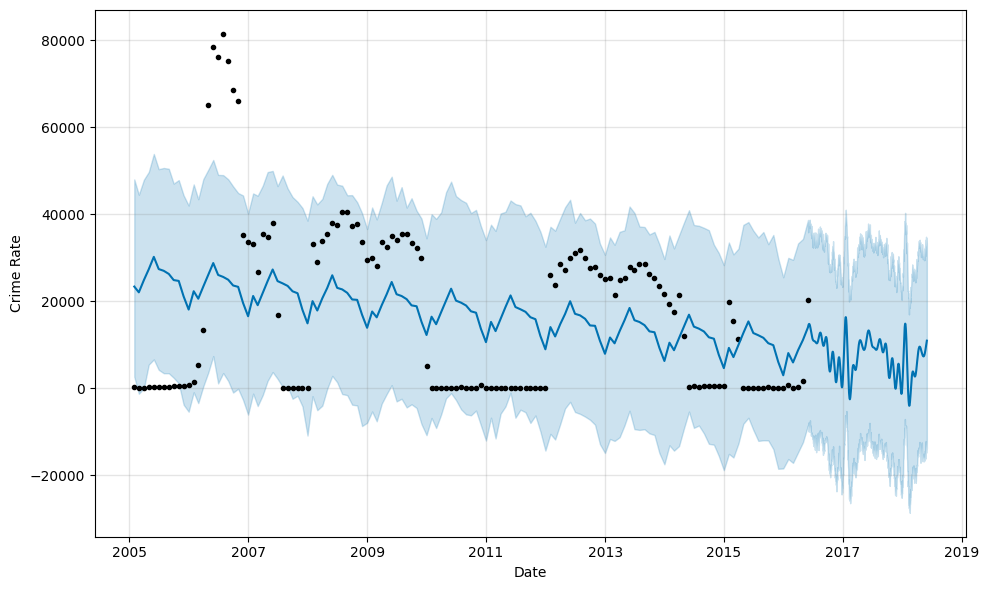

In [93]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

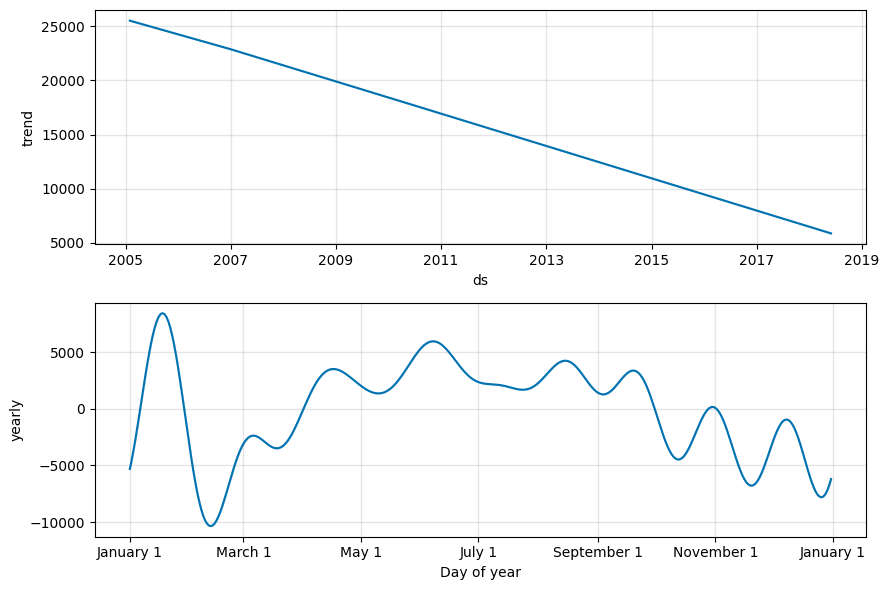

In [94]:
figure3 = m.plot_components(forecast)